In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Formulation  of the problem

Say I have a set of 10 repeated measurements for 5 different experimental settings. 

How should I fit this data?  

There are two  approaches I can think of that should be equivalent:

1. Use `curve_fit` with all the data, providing no sigma (assumption  of equal vertical error on each point)
2. For each x-value, calculate the average y value and the standard deviation. Feed this then into curve_fit as the error value using `sigma=` and then also specify that these represent the absolute error using `absolute_sigma=True`

On first glance, I thought that these would be equivalent. But my experiments below suggest it is not...?

## Generate the data

To make sure I avoid the problems of convergence for small sets of numbers, I will make the generated data with 100 repetitions for each x-value.

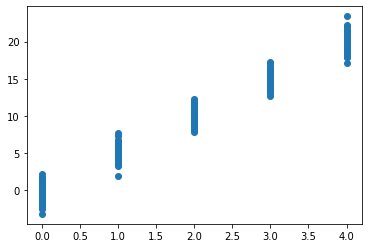

In [83]:
N = 5 # x values
M =  100 # repeat
x  = np.array(list(range(N))*M)
y = 5*x + np.random.normal(size=N*M)
plt.plot(x,y,'o')

## Technique 1:  Fit without absolute error

In [84]:
from scipy.optimize import curve_fit

In [85]:
def f(x,a,b):
    return a*x + b

val,cov = curve_fit(f,x,y)

print(val[0])
print(val[1])
print()
print(np.sqrt(cov[0,0]))
print(np.sqrt(cov[1,1]))

5.003641448494591
-0.018260549240249845

0.03140993465036448
0.07693848787434143


##  Technique 2: Calculate standard deviation and use that as absolute error

In [87]:
xs = np.reshape(x,(M,N))
#xs

In [88]:
xavg = np.average(xs,axis=0)
xavg

array([0., 1., 2., 3., 4.])

In [89]:
ys = np.reshape(y,(M,N))
yavg = np.average(ys,axis=0)
yerr = np.std(ys,axis=0)

<ErrorbarContainer object of 3 artists>

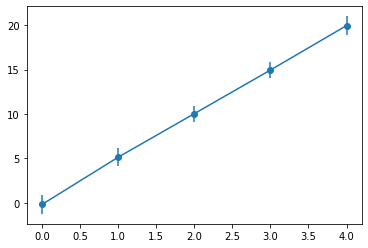

In [90]:
plt.errorbar(xavg,yavg,yerr,marker='o')

In [91]:
val,cov = curve_fit(f,xavg,yavg,sigma=yerr, absolute_sigma=True)

print(val[0])
print(val[1])
print()
print(np.sqrt(cov[0,0]))
print(np.sqrt(cov[1,1]))

4.99865831468316
-0.001298106831086665

0.32798797993246115
0.8006553089815647


OK, crazy, why are these so different? A factor of 10!?

Hmmm...if I increase the number of "repeats", then it gets EVEN worse!

I guess I am missing an important point: the error I am feeding into the fit should not be the standard deviation, since that is the error of a single point, and not of the average. 

The error on the average should be reduced by a factor of $\sqrt{M}$...that must be it! 

Let's check.

In [92]:
val,cov = curve_fit(f,xavg,yavg,sigma=yerr/np.sqrt(M), absolute_sigma=True)

print(val[0])
print(val[1])
print()
print(np.sqrt(cov[0,0]))
print(np.sqrt(cov[1,1]))

4.998658414160376
-0.0012981842953818656

0.0327972861422589
0.08006265957964656


**Oooooooo, yeah!**